<a href="https://colab.research.google.com/github/WriterTyper/descriptive-stats/blob/main/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
library(broom)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
install.packages("palmerpenguins")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(palmerpenguins)

In [5]:
dat <- penguins 

In [6]:
aov(flipper_length_mm ~ species,
  data = dat
) %>% tidy() 

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
species,2,52473.28,26236.6419,594.8016,1.35171e-111
Residuals,339,14953.26,44.1099,NA,NA


In [7]:
aov(flipper_length_mm ~ species,
  data = dat
) %>% glance() 

logLik,AIC,BIC,deviance,nobs,r.squared
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
-1131.293,2270.587,2285.926,14953.26,342,0.7782289


In [8]:
model <- aov(flipper_length_mm ~ species,
  data = dat
)

In [9]:
aov(flipper_length_mm ~ species + sex + species:sex,  data = dat) %>% tidy() 

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
species,2,50525.8836,25262.94181,789.911803,6.277512e-126
sex,1,3905.6038,3905.60377,122.118894,2.461150e-24
species:sex,2,329.0425,164.52124,5.144186,6.314424e-03
Residuals,327,10458.1068,31.98198,NA,NA


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


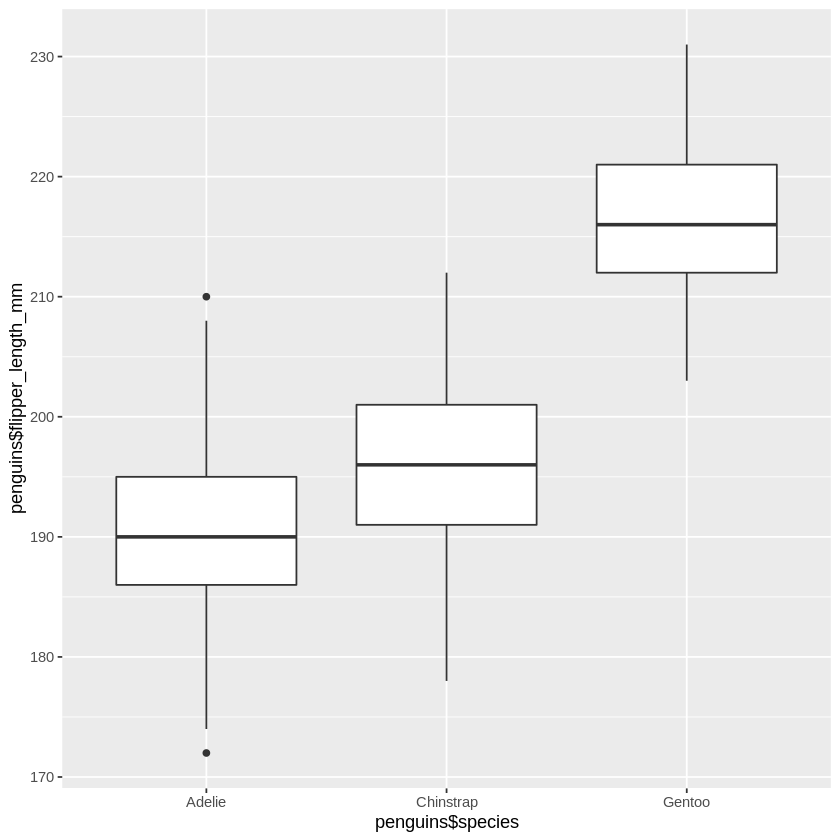

In [10]:
qplot(penguins$flipper_length_mm, penguins$species, geom = "boxplot")  + coord_flip()

In [11]:
# leveneTest(model) %>%  tidy()

In [12]:
TukeyHSD(model) %>% tidy()

term,contrast,null.value,estimate,conf.low,conf.high,adj.p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
species,Chinstrap-Adelie,0,5.869887,3.586583,8.153191,1.137329e-08
species,Gentoo-Adelie,0,27.233349,25.334376,29.132323,0.000000e+00
species,Gentoo-Chinstrap,0,21.363462,19.000841,23.726084,0.000000e+00


In [13]:
# t.test(data = mtcars, mpg ~ cyl)

In [14]:
mtcars %>% filter(cyl == "4" | cyl == "8") %>% t.test(data = ., mpg ~ cyl)


	Welch Two Sample t-test

data:  mpg by cyl
t = 7.5967, df = 14.967, p-value = 1.641e-06
alternative hypothesis: true difference in means between group 4 and group 8 is not equal to 0
95 percent confidence interval:
  8.318518 14.808755
sample estimates:
mean in group 4 mean in group 8 
       26.66364        15.10000 


In [15]:
mtcars %>% filter(cyl %in% c("4", "8")) %>% t.test(data = ., mpg ~ cyl, var.equal = TRUE) %>% tidy()

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
11.56364,26.66364,15.1,8.102359,3.446219e-08,23,8.611261,14.51601,Two Sample t-test,two.sided
